In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import load_model
import time
# 全连接层，卷积层，池化层，扁平化，随机关闭神经元
from keras.layers import Dense,Dropout,MaxPool2D,Flatten,Convolution2D
#标签格式转化
from keras.utils import np_utils
# 导入顺序结构
from keras.models import Sequential
#导入Adma优化函数
from tensorflow.keras.optimizers import Adam

In [102]:
# 将训练集和验证集分开
train = pd.read_csv("./train.csv")
X = train.iloc[:,1:]
y = train.iloc[:,0]
x,test_x,y,test_y = train_test_split(X,y,test_size=0.25,random_state=40)
X.count() #42000个数据
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
37674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
x = np.array(x)
y = np.array(y)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [104]:
/#-1是自动匹配数据的个数42000,长宽深度分别28，28，1,再归一化
x = x.reshape(-1,28,28,1) / 255.0
test_x = test_x.reshape(-1,28,28,1) / 255.0
# 转换为 one hot 格式
'''这里使用的numpy下的untils中的to_categorical方法把标签数据给分类
因为有10个数字，所以设置num_classes为10，也就是10个类'''
y = np_utils.to_categorical(y, num_classes=10)
test_y = np_utils.to_categorical(test_y, num_classes=10)

In [105]:
# 创建模型
model = Sequential()
#定义卷积核
model.add(Convolution2D(
    input_shape=(28,28,1),#输入平面大小
    filters=32,#卷积核大小
    kernel_size=5,#卷积窗口大小为5
    strides=1,#步长为1
    padding='same',#边缘补0是same，不补零是valid
    activation='relu'#激活函数
))

In [106]:
#定义第一个池化层
model.add(MaxPool2D(
    pool_size=2,#池化窗口大小
    strides=2,#步长为2
    padding='same'
))

In [107]:
#第二个卷积层
model.add(Convolution2D(64,5,strides=1,padding='same',activation='relu'))

In [108]:
#第二个池化层
model.add(MaxPool2D(2,2,'same'))

In [109]:
#将输出扁平化
model.add(Flatten())

In [110]:
#第一个全连接层
model.add(Dense(1024,activation='relu'))
#Drop，百分之50关闭神经元
model.add(Dropout(0.5))
#第二个全连接层
model.add(Dense(10,activation='softmax'))

In [111]:
# 定义优化器
adam = Adam(learning_rate=1e-4)
# 定义优化器以及loss function即损失函数，训练过程中计算准确率
model.compile(
    optimizer=adam,  # 使用的优化函数
    loss='categorical_crossentropy',
    metrics=['accuracy']  # 计算准确率
)

In [112]:
# 训练模型,使用训练集
'''batch_size=64表示每次会训练64张图片，把42000张图片训练完为1个周期
 epochs是迭代周期，所以这里设置要训练完10个周期'''
history = model.fit(x, y, batch_size=64, epochs=30)

Epoch 1/30
493/493 [==============================] - 51s 98ms/step - loss: 0.4845 - accuracy: 0.8660
Epoch 2/30
493/493 [==============================] - 48s 96ms/step - loss: 0.1364 - accuracy: 0.9592
Epoch 3/30
493/493 [==============================] - 47s 95ms/step - loss: 0.0884 - accuracy: 0.9729
Epoch 4/30
493/493 [==============================] - 48s 97ms/step - loss: 0.0711 - accuracy: 0.9783
Epoch 5/30
493/493 [==============================] - 45s 92ms/step - loss: 0.0590 - accuracy: 0.9818
Epoch 6/30
493/493 [==============================] - 40s 81ms/step - loss: 0.0474 - accuracy: 0.9858
Epoch 7/30
493/493 [==============================] - 40s 81ms/step - loss: 0.0436 - accuracy: 0.9865
Epoch 8/30
493/493 [==============================] - 40s 82ms/step - loss: 0.0381 - accuracy: 0.9878
Epoch 9/30
493/493 [==============================] - 44s 89ms/step - loss: 0.0334 - accuracy: 0.9890
Epoch 10/30
493/493 [==============================] - 40s 82ms/step - loss: 0.028

In [159]:
import h5py

In [163]:
model.save('model/model.h5')
file = h5py.File('model/mymodel.h5')
new_model = load_model(file)
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [14]:
# type(history)
# history.historyi

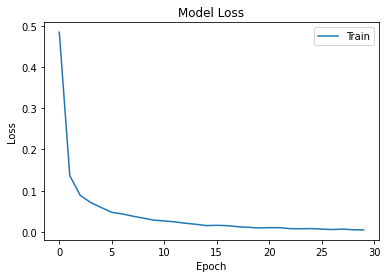

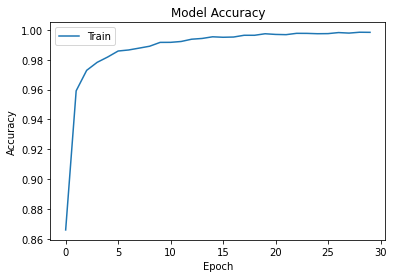

In [165]:
import matplotlib.pyplot as plt
 
# 绘制损失曲线
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# 绘制准确率曲线
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [166]:
# 评估模型，使用验证集
loss, accuracy = model.evaluate(test_x,test_y)
print('loss:', loss)
print('accuracy:', accuracy)

329/329 [==============================] - 3s 10ms/step - loss: 0.0394 - accuracy: 0.9904
loss: 0.03940822184085846
accuracy: 0.9903809428215027


In [167]:
test = pd.read_csv("./test.csv")
test = np.array(test).reshape(-1,28,28,1)/255.0
val = model.predict(test,batch_size=64)

438/438 [==============================] - 7s 15ms/step


In [168]:
val.shape

(28000, 10)

In [169]:
val = np.argmax(val,axis = 1)
val

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

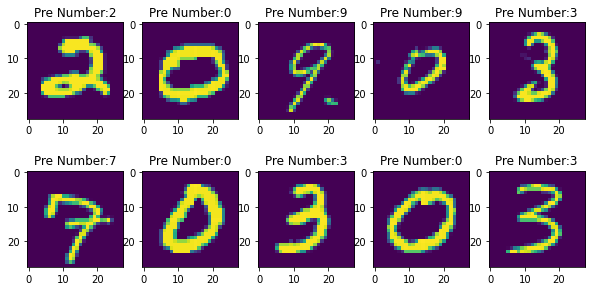

In [170]:
#测试集里的数字
test0 = pd.read_csv("./test.csv")
plt.figure(figsize = (10,5))  #设置图片显示宽高

for num in range(0,10):
    plt.subplot(2,5,num+1)  #设置图片排列方式，和当前位置
    #将长度为784的向量数据转化为28*28的矩阵
    grid_data = test0.iloc[num].values.reshape(28,28)
    #显示图片，颜色为黑白
#     plt.imshow(grid_data, interpolation = "none", cmap = "Greys")
    plt.imshow(grid_data)
    plt.title('Pre Number:{}'.format(val[num]))

In [21]:
submission_df = pd.DataFrame({
                  "ImageId": range(1,len(test)+1),
                  "Label":val})
submission_df.to_csv("simplemnist_result.csv",index=False)
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [22]:
score = 0.98939